In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.metrics import mean_absolute_error, mean_squared_error

tf.__version__

2023-03-31 12:43:27.764106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 12:43:27.938486: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 12:43:28.480788: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-31 12:43:28.480832: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

'2.11.0'

In [3]:
# Load dataset
csv_file = '../Dataset/dataset_augmented.csv'
dataframe_raw = pd.read_csv(csv_file)
dataframe_raw = dataframe_raw.drop(dataframe_raw.columns[0],axis=1) # remove first column (no information there)
dataframe_raw.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,Nsubs,R,lambd
0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,2,484.4822,350.23
1,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,2,484.4822,350.23
2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,2,774.6917,347.50
3,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,774.6917,347.50
4,0,0,0,0,0,0,0,2,1,0,0,0,0,0,3,3,4,644.6140,364.11


In [4]:
dataframe = dataframe_raw.copy()

# Create a target variable
dataframe['target'] = dataframe['R']

# Create array with number of subtitutes
nsubs = []
nsubs[:] = dataframe['Nsubs']

# Drop unused features.
dataframe = dataframe.drop(columns=['R', 'lambd', 'Nsubs'])
dataframe.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,target
0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,484.4822
1,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,484.4822
2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,774.6917
3,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,774.6917
4,0,0,0,0,0,0,0,2,1,0,0,0,0,0,3,3,644.6140


2
64
272
80
80


(array([  2.,  64., 272.,  80.,  80.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

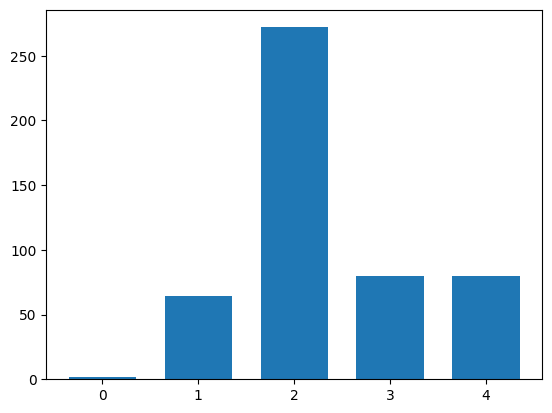

In [5]:
# number of substitutes

n0 = nsubs.count(0)
n1 = nsubs.count(1)
n2 = nsubs.count(2)
n3 = nsubs.count(3)
n4 = nsubs.count(4)
print(n0)
print(n1)
print(n2)
print(n3)
print(n4)

bin_edges = np.arange(-0.5,4.5+1,1)
plt.hist(nsubs, bins=bin_edges, rwidth=0.7)

In [6]:
# Check overal statistis of each input feature 
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,498.0,0.353414,0.959753,0.00000,0.0000,0.0000,0.0000,4.0000
Pos2,498.0,0.427711,1.080183,0.00000,0.0000,0.0000,0.0000,4.0000
Pos3,498.0,0.363454,0.990107,0.00000,0.0000,0.0000,0.0000,4.0000
Pos4,498.0,0.331325,0.943400,0.00000,0.0000,0.0000,0.0000,4.0000
Pos5,498.0,0.383534,1.000749,0.00000,0.0000,0.0000,0.0000,4.0000
Pos6,498.0,0.321285,0.917738,0.00000,0.0000,0.0000,0.0000,4.0000
Pos7,498.0,0.339357,0.946930,0.00000,0.0000,0.0000,0.0000,4.0000
Pos8,498.0,0.417671,1.022016,0.00000,0.0000,0.0000,0.0000,4.0000
Pos9,498.0,0.417671,1.022016,0.00000,0.0000,0.0000,0.0000,4.0000
Pos10,498.0,0.339357,0.946930,0.00000,0.0000,0.0000,0.0000,4.0000


In [7]:
# remove data with R~8

dataframe = dataframe[ dataframe['target']>10 ]
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,496.0,0.354839,0.961426,0.0000,0.000000,0.00000,0.00000,4.0000
Pos2,496.0,0.429435,1.082020,0.0000,0.000000,0.00000,0.00000,4.0000
Pos3,496.0,0.364919,0.991835,0.0000,0.000000,0.00000,0.00000,4.0000
Pos4,496.0,0.318548,0.922961,0.0000,0.000000,0.00000,0.00000,4.0000
Pos5,496.0,0.381048,0.999982,0.0000,0.000000,0.00000,0.00000,4.0000
Pos6,496.0,0.322581,0.919362,0.0000,0.000000,0.00000,0.00000,4.0000
Pos7,496.0,0.340726,0.948595,0.0000,0.000000,0.00000,0.00000,4.0000
Pos8,496.0,0.413306,1.017297,0.0000,0.000000,0.00000,0.00000,4.0000
Pos9,496.0,0.413306,1.017297,0.0000,0.000000,0.00000,0.00000,4.0000
Pos10,496.0,0.340726,0.948595,0.0000,0.000000,0.00000,0.00000,4.0000


In [8]:
# normalize numerical targets

R_mean = dataframe['target'].mean()
R_std = dataframe['target'].std()

dataset = dataframe.copy()

dataset['target']=(dataset['target']-R_mean)/R_std

# Check overal statistis of each input feature 
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,496.0,3.548387e-01,0.961426,0.000000,0.000000,0.000000,0.000000,4.000000
Pos2,496.0,4.294355e-01,1.082020,0.000000,0.000000,0.000000,0.000000,4.000000
Pos3,496.0,3.649194e-01,0.991835,0.000000,0.000000,0.000000,0.000000,4.000000
Pos4,496.0,3.185484e-01,0.922961,0.000000,0.000000,0.000000,0.000000,4.000000
Pos5,496.0,3.810484e-01,0.999982,0.000000,0.000000,0.000000,0.000000,4.000000
Pos6,496.0,3.225806e-01,0.919362,0.000000,0.000000,0.000000,0.000000,4.000000
Pos7,496.0,3.407258e-01,0.948595,0.000000,0.000000,0.000000,0.000000,4.000000
Pos8,496.0,4.133065e-01,1.017297,0.000000,0.000000,0.000000,0.000000,4.000000
Pos9,496.0,4.133065e-01,1.017297,0.000000,0.000000,0.000000,0.000000,4.000000
Pos10,496.0,3.407258e-01,0.948595,0.000000,0.000000,0.000000,0.000000,4.000000


In [25]:
# Shuffle the dataset
dataset = dataset.sample(frac=1,random_state=38).reset_index(drop=True)

# Split the dataframe into training, validation, and test sets

### IMPORTANT: Select for normalization
#train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])
train, val, test = np.split(dataset.sample(frac=1), [int(0.8*len(dataset)), int(0.9*len(dataset))])
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

396 training examples
50 validation examples
50 test examples


In [26]:
# Create an input pipeline using tf.data

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

# Example: 
batch_size = 1
train_ds = df_to_dataset(train, batch_size=batch_size)

[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of Pos1:', train_features['Pos1'])
print('A batch of targets (R):', label_batch )

Every feature: ['Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6', 'Pos7', 'Pos8', 'Pos9', 'Pos10', 'Pos11', 'Pos12', 'Pos13', 'Pos14', 'Pos15', 'Pos16', 'target']
A batch of Pos1: tf.Tensor([[0]], shape=(1, 1), dtype=int64)
A batch of targets (R): tf.Tensor([-0.42229275], shape=(1,), dtype=float64)


/tmp/ipykernel_65884/3198051929.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [27]:
# Numerical columns preprocessing layer

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [28]:
# Categorical columns preprocessing layer

def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [29]:
# Create an input pipeline
batch_size = 2
# shuffle is set to False, as it was already done before
#train_ds = df_to_dataset(train, batch_size=batch_size)
train_ds = df_to_dataset(train, shuffle=False, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/tmp/ipykernel_65884/3198051929.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
/tmp/ipykernel_65884/3198051929.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [30]:
# Preprocess selected features (categorical and numerical)

all_inputs = []
encoded_features = []

# Multi-hot encoding and add the resulting feature inputs to encoded_features
categorical_cols = ['Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6', 
                    'Pos7', 'Pos8', 'Pos9', 'Pos10', 'Pos11', 'Pos12', 
                    'Pos13', 'Pos14', 'Pos15', 'Pos16']
#categorical_cols= list(train_features.keys())
#categorical_cols = categorical_cols[0:16]
print("Categorical cols: "+str(categorical_cols))
for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='int64',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

# Normalize numerical features.
""" numeric_cols = ['X', 'Y', 'Z']
print("Numerical cols: "+str(numeric_cols))
for header in numeric_cols:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col) """

""" numeric_cols = ['target']
print("Numerical cols: "+str(numeric_cols))
for header in numeric_cols:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col) """

Categorical cols: ['Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6', 'Pos7', 'Pos8', 'Pos9', 'Pos10', 'Pos11', 'Pos12', 'Pos13', 'Pos14', 'Pos15', 'Pos16']


' numeric_cols = [\'target\']\nprint("Numerical cols: "+str(numeric_cols))\nfor header in numeric_cols:\n  numeric_col = tf.keras.Input(shape=(1,), name=header)\n  normalization_layer = get_normalization_layer(header, train_ds)\n  encoded_numeric_col = normalization_layer(numeric_col)\n  all_inputs.append(numeric_col)\n  encoded_features.append(encoded_numeric_col) '

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Pos1 (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Pos2 (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Pos3 (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Pos4 (InputLayer)              [(None, 1)]          0           []                               
                                                                                            

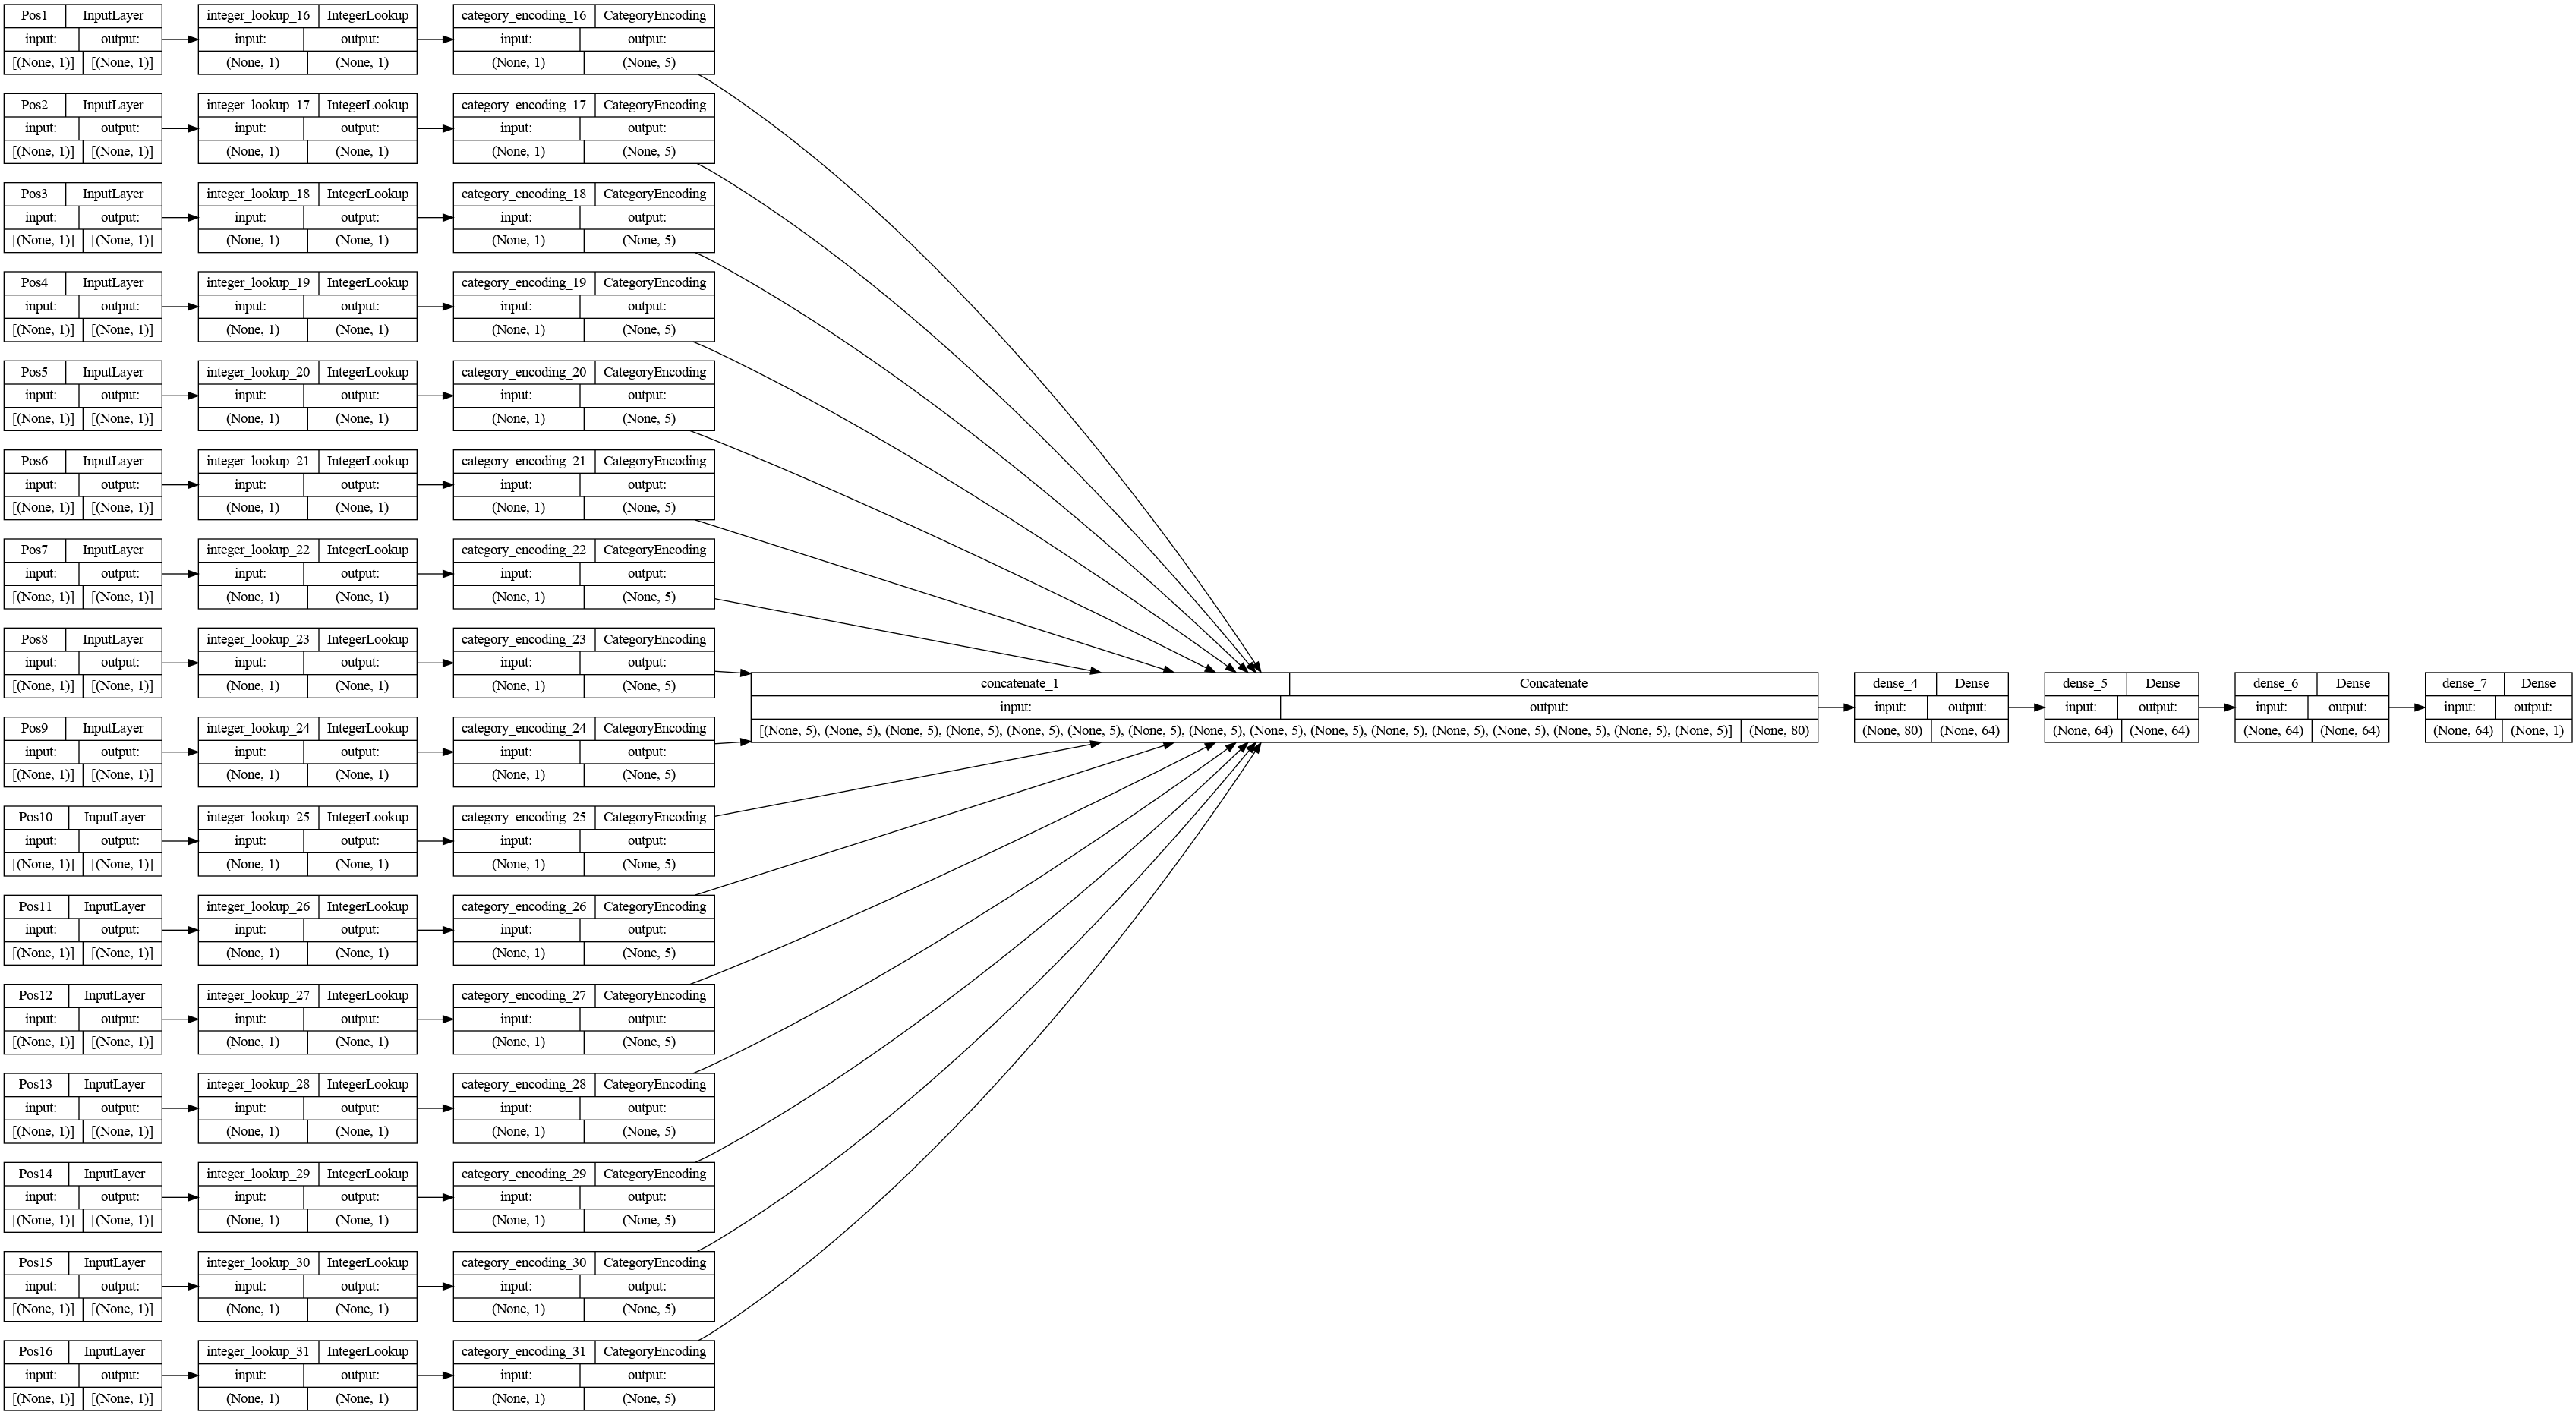

In [31]:
# Create the model architecture
all_features = tf.keras.layers.concatenate(encoded_features)

# tiny model
#x = tf.keras.layers.Dense(8, activation="relu")(all_features)

# small model 
#x = tf.keras.layers.Dense(16, activation="relu")(all_features)
#x = tf.keras.layers.Dense(16, activation="relu")(x)

# medium model
x = tf.keras.layers.Dense(64, activation="relu")(all_features)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)

# large model
#x = tf.keras.layers.Dense(512, activation="relu")(all_features)
#x = tf.keras.layers.Dense(512, activation="relu")(x)
#x = tf.keras.layers.Dense(512, activation="relu")(x)
#x = tf.keras.layers.Dense(512, activation="relu")(x)

# large model with L2-regularization and dropout
""" x = tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x) """

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)
model.summary()

#loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001)
# compile the model
model.compile(#optimizer='adam',
              #loss='mean_absolute_error',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(0.0001)
              #optimizer=tf.keras.optimizers.Adam(0.001),
              #metrics=["accuracy"])
)

tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")


In [32]:
# Train the model
#history = model.fit(train_ds, epochs=300, verbose=2, validation_data=val_ds)
history = model.fit(train_ds, epochs=100, verbose=2, validation_data=val_ds)


Epoch 1/100


/home/alfonso/Work/UGR/Calculations/Helicenes_GNNs/Helicenes_venv/lib/python3.10/site-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


198/198 - 1s - loss: 0.7674 - val_loss: 0.8351 - 1s/epoch - 6ms/step
Epoch 2/100
198/198 - 0s - loss: 0.7352 - val_loss: 0.8171 - 186ms/epoch - 940us/step
Epoch 3/100
198/198 - 0s - loss: 0.7018 - val_loss: 0.7957 - 185ms/epoch - 936us/step
Epoch 4/100
198/198 - 0s - loss: 0.6582 - val_loss: 0.7709 - 186ms/epoch - 942us/step
Epoch 5/100
198/198 - 0s - loss: 0.6067 - val_loss: 0.7252 - 186ms/epoch - 937us/step
Epoch 6/100
198/198 - 0s - loss: 0.5499 - val_loss: 0.6918 - 199ms/epoch - 1ms/step
Epoch 7/100
198/198 - 0s - loss: 0.4943 - val_loss: 0.6430 - 185ms/epoch - 933us/step
Epoch 8/100
198/198 - 0s - loss: 0.4426 - val_loss: 0.6064 - 184ms/epoch - 930us/step
Epoch 9/100
198/198 - 0s - loss: 0.3999 - val_loss: 0.5624 - 187ms/epoch - 944us/step
Epoch 10/100
198/198 - 0s - loss: 0.3636 - val_loss: 0.5310 - 190ms/epoch - 958us/step
Epoch 11/100
198/198 - 0s - loss: 0.3365 - val_loss: 0.5034 - 186ms/epoch - 939us/step
Epoch 12/100
198/198 - 0s - loss: 0.3142 - val_loss: 0.4901 - 194ms/epo

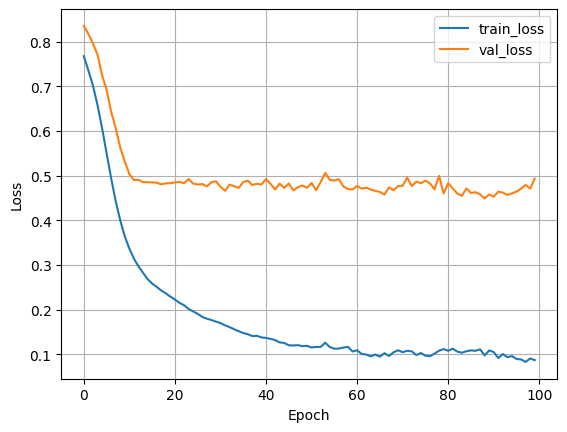

In [33]:
# Plot the loss

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [34]:
def plot_PredvsTrue(y_true, y_pred):

    plt.figure(figsize=(3, 3), dpi=200)
    p1 = min(y_true)
    p2 = max(y_true)
    #p1 = 0
    #p2 = 64
    #p1 = max(max(y_pred), max(y_true))
    #p2 = min(min(y_pred), min(y_true))
    plt.plot([p1, p2], [p1, p2], 'r--', label="Exact")
    plt.scatter(y_true,y_pred,color="blue",label="Model",s=6)
    plt.xlabel('True',fontsize=15)
    plt.ylabel('Pred',fontsize=15)
    plt.legend(loc="upper left")
    plt.show()

25/25 [==============================] - 0s 978us/step
(50, 1)
(50, 1)


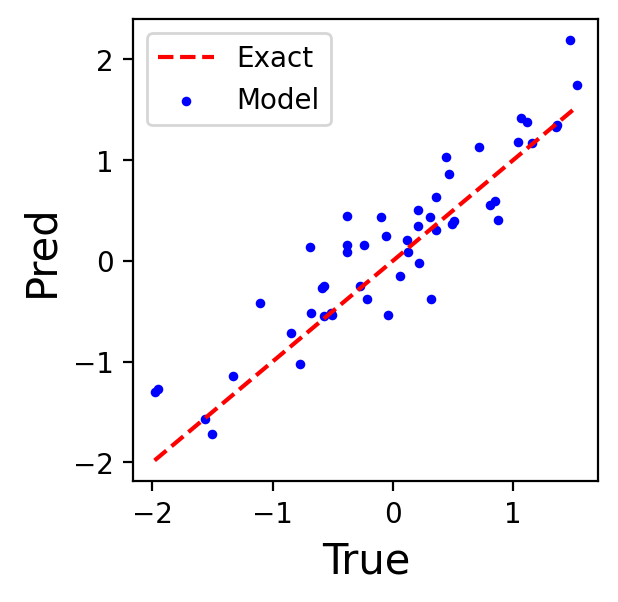

Test MAE: 0.29552698374572645


In [35]:
# Pred vs True values on test set 

y_pred = model.predict(test_ds)
y_pred.shape
y_true = np.zeros((len(test['target']),1))
y_true[:,0] = test['target']

print(y_true.shape)
print(y_pred.shape)
#print(y_true)
#print(y_pred)

plot_PredvsTrue(y_true, y_pred)

test_mae = mean_absolute_error(y_true,y_pred)
print("Test MAE: "+str(test_mae))

198/198 [==============================] - 0s 878us/step
(396, 1)
(396, 1)


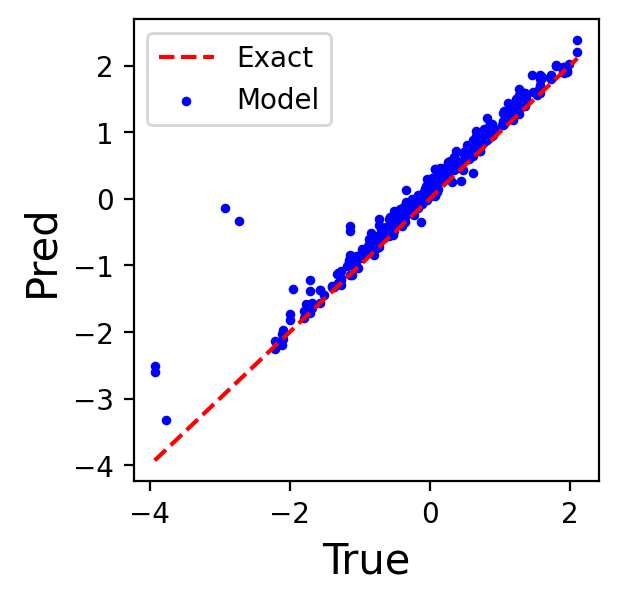

Train MAE: 0.17220194266132388


In [36]:
# Pred vs True values on training set 

y_pred = model.predict(train_ds)
y_pred.shape
y_true = np.zeros((len(train['target']),1))
y_true[:,0] = train['target']

print(y_true.shape)
print(y_pred.shape)
#print(y_true)
#print(y_pred)

plot_PredvsTrue(y_true, y_pred)

test_mae = mean_absolute_error(y_true,y_pred)
print("Train MAE: "+str(test_mae))

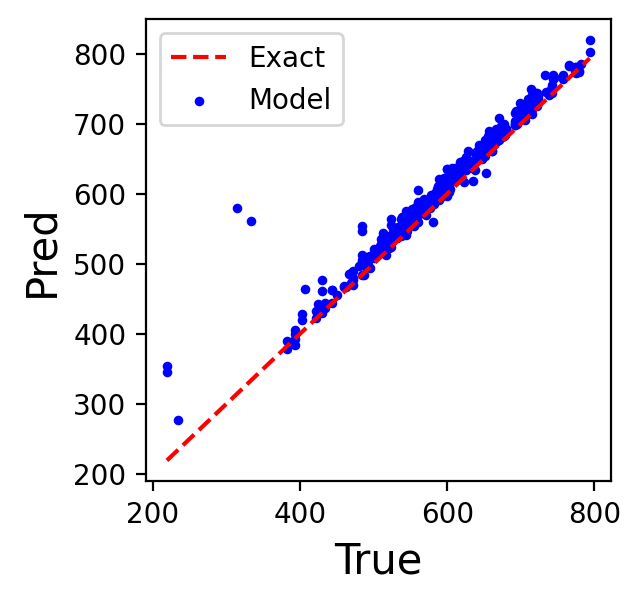

Train MAE (non-normalized): 16.3803588851158


In [37]:
# Evaluate the model with non-normalized units

y_true = y_true * R_std + R_mean
y_pred = y_pred * R_std + R_mean

#print("True: "+str(y_true))
#print("Pred: "+str(y_pred))

plot_PredvsTrue(y_true, y_pred)

test_mae = mean_absolute_error(y_true,y_pred)
print("Train MAE (non-normalized): "+str(test_mae))

In [65]:
# save model

#model.save('R_model_good_tiny')
#model.save('R_model_good_small')
#model.save('R_model_good_medium')
#model.save('R_model_good_large')
#reloaded_model = tf.keras.models.load_model('R_model')

INFO:tensorflow:Assets written to: R_model_good_medium/assets


INFO:tensorflow:Assets written to: R_model_good_medium/assets


25/25 [==============================] - 0s 886us/step


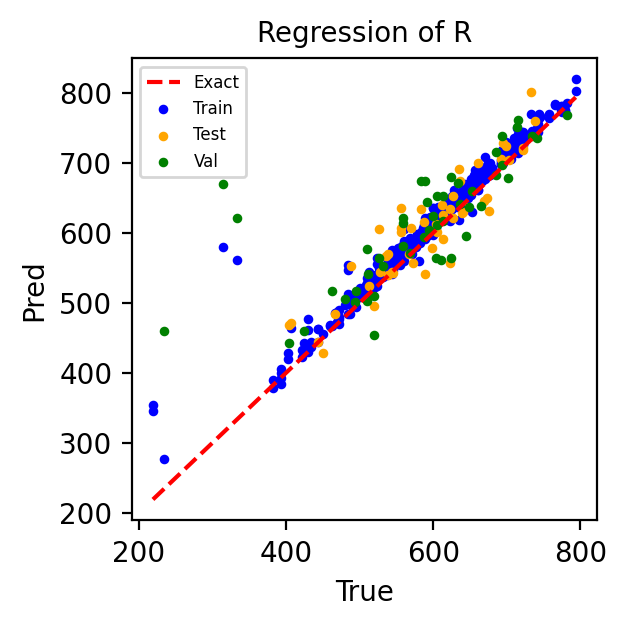

train MAE (non-normalized): 16.3803588851158
test MAE (non-normalized): 28.11140471874999
val MAE (non-normalized): 46.90715452148437


In [38]:
# Evaluate the model with non-normalized units on the whole dataset

y_pred_test = model.predict(test_ds)
y_true_test = np.zeros((len(test['target']),1))
y_true_test[:,0] = test['target']

y_pred_train = model.predict(train_ds)
y_true_train = np.zeros((len(train['target']),1))
y_true_train[:,0] = train['target']

y_pred_val = model.predict(val_ds)
y_true_val = np.zeros((len(val['target']),1))
y_true_val[:,0] = val['target']

y_true_test = y_true_test * R_std + R_mean
y_pred_test = y_pred_test * R_std + R_mean
y_true_test = y_true_test.ravel()
y_pred_test = y_pred_test.ravel()

y_true_train = y_true_train * R_std + R_mean
y_pred_train = y_pred_train * R_std + R_mean
y_true_train = y_true_train.ravel()
y_pred_train = y_pred_train.ravel()

y_true_val = y_true_val * R_std + R_mean
y_pred_val = y_pred_val * R_std + R_mean
y_true_val = y_true_val.ravel()
y_pred_val = y_pred_val.ravel()

plt.figure(figsize=(3, 3), dpi=200)
plt.title("Regression of R",fontsize=10)
p1 = min(y_true_train)
p2 = max(y_true_train)
plt.plot([p1, p2], [p1, p2], 'r--', label="Exact")
plt.scatter(y_true_train,y_pred_train,color="blue",label="Train",s=6)
plt.scatter(y_true_test,y_pred_test,color="orange",label="Test",s=6)
plt.scatter(y_true_val,y_pred_val,color="green",label="Val",s=6)
plt.xlabel('True',fontsize=10)
plt.ylabel('Pred',fontsize=10)
plt.legend(loc="upper left",prop={'size': 6})
plt.show()

train_mae = mean_absolute_error(y_true_train,y_pred_train)
print("train MAE (non-normalized): "+str(train_mae))
test_mae = mean_absolute_error(y_true_test,y_pred_test)
print("test MAE (non-normalized): "+str(test_mae))
val_mae = mean_absolute_error(y_true_val,y_pred_val)
print("val MAE (non-normalized): "+str(val_mae))

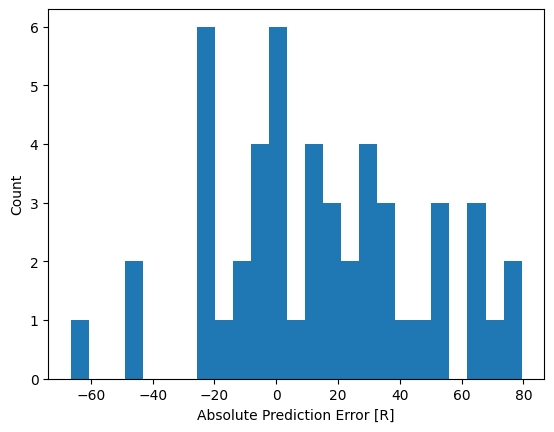

In [40]:
# Error distribution
error = y_pred_test - y_true_test
plt.hist(error, bins=25)
plt.xlabel('Absolute Prediction Error [R]')
_ = plt.ylabel('Count')


In [50]:
y_pred = np.concatenate((y_pred_train,y_pred_test,y_pred_val))
y_true = np.concatenate((y_true_train,y_true_test,y_true_val))
#print(y_true.shape)
#print(y_pred.shape)
#print(y_true)
#print(y_pred)
y_true = y_true.ravel()
y_pred = y_pred.ravel()
#print("True: "+str(y_true))
#print("Pred: "+str(y_pred))

# explore data

data = dataset.to_numpy()

#print()
print("Data id, nº halogens, y_true, y_pred, abs(y_pred-y_true)")

error_nhalogens = np.zeros(4)
num_nhalogens = np.zeros(4)
error_halogentype = np.zeros(4)
num_halogentype = np.zeros(4)
nsubs = np.zeros(len(y_pred))

for i in range(len(y_pred)):
    diff = abs(y_pred[i]-y_true[i])
    x_data = data[i,0:15]
    n_halogens = np.count_nonzero(x_data)
    #print(data[i,0:15])
    #print(n_halogens)
    nsubs[i] = n_halogens

    error_nhalogens[n_halogens-1] = error_nhalogens[n_halogens-1] + diff
    num_nhalogens[n_halogens-1] = num_nhalogens[n_halogens-1] + 1

    print(str(i)+"  "+str(n_halogens)+"  "+str(y_true[i])+"  "+str(y_pred[i])+"  "+str(diff))


error_nhalogens[:] = error_nhalogens[:] / num_nhalogens[:]
print()
print("Mean Absolute Error (MAE) according to nº halogens: 1 halogen, 2 halogens, 3 halogens, 4 halogens")
print(error_nhalogens)

Data id, nº halogens, y_true, y_pred, abs(y_pred-y_true)
0  2  666.3543  674.44214  8.087838671875033
1  2  603.6019  606.76544  3.1635418945312495
2  3  406.9158  464.2361  57.320314501953135
3  2  658.6581  670.79364  12.13554013671876
4  4  559.161  566.4471  7.2860825195313055
5  3  582.645  584.83685  2.191853027343768
6  3  625.4228  633.2802  7.857412402343698
7  2  680.4316  692.4093  11.977701757812497
8  2  429.9146  460.64935  30.734753027343743
9  2  590.4179  600.8898  10.471870507812469
10  4  460.3599  467.72226  7.362359521484393
11  2  662.1677  672.5467  10.378991894531282
12  3  668.6168  681.63544  13.018637011718738
13  3  507.2717  515.64514  8.37344160156249
14  3  703.0072  714.387  11.379823925781238
15  2  333.589  561.1176  227.52861474609375
16  3  673.0409  691.8043  18.763421289062535
17  2  576.8431  579.46466  2.6215606445312005
18  2  623.7961  634.4995  10.703411718749976
19  1  484.8454  484.11746  0.7279378417968587
20  1  524.0781  531.95465  7.8765

In [52]:
y_pred_outlier = y_pred[ y_true<380 ]
y_true_outlier = y_true[ y_true<380 ]
nsubs_outlier = nsubs[ y_true<380]


for i in range(len(y_pred_outlier)):
    
    print(str(i)+"  "+str(nsubs_outlier[i])+"  "+str(y_true_outlier[i])+"  "+str(y_pred_outlier[i]))

0  2.0  333.589  561.1176
1  2.0  219.15390000000002  345.16782
2  2.0  219.15390000000002  353.5736
3  2.0  314.7397  580.02576
4  1.0  234.15930000000003  276.3379
5  1.0  234.15930000000003  459.6872
6  2.0  314.7397  669.43
7  4.0  333.589  621.3453


In [ ]:
# Bad points are probably points without a representative molecule in the training data